In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

from moepy import lowess, eda

bounds = np.load("../proprietary/edh_boundaries.npy")
transients = np.load("../proprietary/transients_interp.npy")

tr1 = np.array_split(transients[0, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

In [69]:
# Remove ambient light
filters = []
for val in tr1:
    if val == stats.mode(tr1):
        filters.append(False)
    else:
        filters.append(True)
tr1 = tr1[filters]
bd1 = bd1[filters]

array([[ 1.10000000e-03, -8.53365579e-19],
       [ 1.10000000e-03, -1.68737540e-18],
       [ 1.10000000e-03, -6.32756751e-18],
       [ 1.10000000e-03,  8.64646057e-18],
       [ 1.10000000e-03, -9.98437759e-18],
       [ 1.10000000e-03, -2.39625483e-17],
       [ 1.10000000e-03,  5.50555542e-24],
       [ 1.10000000e-03, -1.59750378e-17],
       [ 1.10000000e-03, -7.18876297e-17],
       [ 1.10000000e-03, -7.98751510e-17],
       [ 1.10000000e-03, -4.39313351e-17],
       [ 1.10000000e-03, -4.79251007e-17],
       [ 1.10000000e-03, -5.19188471e-17],
       [ 1.10000000e-03, -5.59126129e-17],
       [ 1.10000000e-03,  6.00975718e-24],
       [ 5.06439604e-13,  2.36026177e-08],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 8.42526780e-13,  5.75900755e-08],
       [ 1.93300702e-02, -2.25203472e-07],
       [ 1.14481870e-02, -1.12091072e-07],
       [ 4.

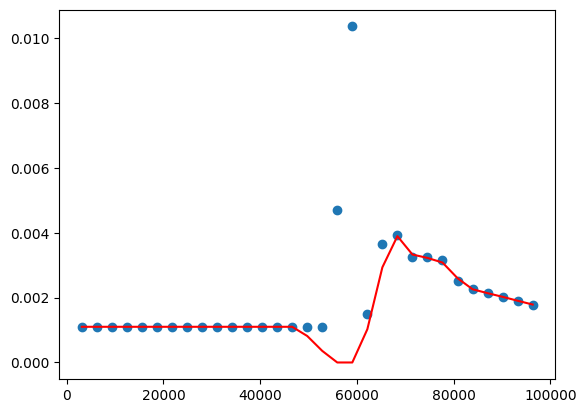

In [2]:
lowess_model = lowess.Lowess()
lowess_model.fit(bd1, tr1, frac=0.1)
pred_lowess_vals = lowess_model.predict(bd1)
plt.scatter(bd1, tr1)
plt.plot(bd1, pred_lowess_vals, 'r')
lowess_model.design_matrix